# Requirements

In [ ]:
import pandas as pd

In [ ]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **count of page loads**. Your task involves employing bagging and boosting methods to forecast the **count of page loads**. To accomplish this, you will use data from the preceding three days, consisting of **count of page loads**, **count of unique visits**, **count of first time-visits**, **count of returning visits**, and the current **day**.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Website Visitors Dataset

## Downloading the Website Visitors Dataset

In [ ]:
!gdown 1h1P3NboXKbWNngqgCB1i4bHFRcv7uDJe # Download the dataset.

Downloading...
From: https://drive.google.com/uc?id=1h1P3NboXKbWNngqgCB1i4bHFRcv7uDJe
To: /content/website-visitors.csv
100% 92.8k/92.8k [00:00<00:00, 54.9MB/s]


## Exploring the Website Visitors Dataset
This datatset consists of daily counts of page loads, unique visitors, first-time visitors, and returning visitors for an academic teaching notes website. The dataset contains 2167 rows spanning from September 14, 2014, to August 19, 2020. A visit is defined as a series of hits on one or more pages by the same user on a given day, identified by IP address. Shared IP addresses are considered a single user. A visit is "unique" if a hit from the same IP address hasn't occurred within the last 6 hours. Returning visitors are identified by cookies, and the rest are classified as first-time visitors. The unique visitor count is the sum of returning and first-time visitors.

The dataset consists of the following columns:
- date - date in mm/dd/yyyy format,
- day_of_week - day of the week in text form (Monday, Tuesday, etc.),
- page_loads - daily number of pages loaded,
- unique_visits - daily number of visitors from IP addresses with no hits in over 6 hours,
- first_time_visits - number of unique visitors without a identifying cookie, and
- returning_visits - number of unique visitors minus first-time visitors.

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [ ]:
# Write your code here. Add as many boxes as you need.
import pandas as pd
df=pd.read_csv('/content/website-visitors.csv')

In [ ]:
df.head()

,date,day_of_week,page_loads,unique_visits,first_time_visits,returning_visits
0,9/14/2014,Sunday,2.146,1.582,1.430,152.0
1,9/15/2014,Monday,3.621,2.528,2.297,231.0
2,9/16/2014,Tuesday,3.698,2.630,2.352,278.0
3,9/17/2014,Wednesday,3.667,2.614,2.327,287.0
4,9/18/2014,Thursday,3.316,2.366,2.130,236.0


Explore the dataset using visualizations of your choice.

array([[<Axes: title={'center': 'page_loads'}>,
        <Axes: title={'center': 'unique_visits'}>],
       [<Axes: title={'center': 'first_time_visits'}>,
        <Axes: title={'center': 'returning_visits'}>]], dtype=object)

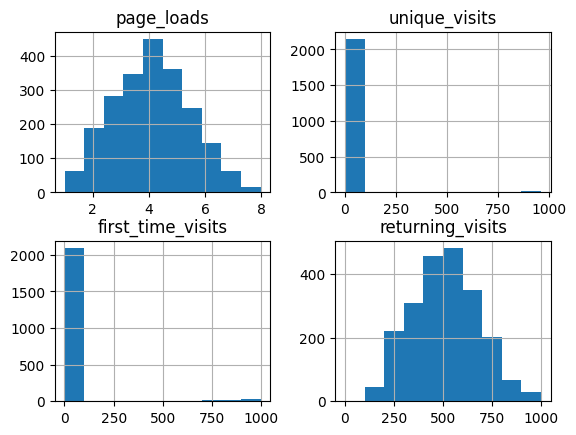

In [ ]:
# Write your code here. Add as many boxes as you need.
df.hist()

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

In [ ]:
df.head()

,day_of_week,page_loads,unique_visits,first_time_visits,returning_visits
date,,,,,
2014-09-14,Sunday,2.146,1.582,1.430,152.0
2014-09-15,Monday,3.621,2.528,2.297,231.0
2014-09-16,Tuesday,3.698,2.630,2.352,278.0
2014-09-17,Wednesday,3.667,2.614,2.327,287.0
2014-09-18,Thursday,3.316,2.366,2.130,236.0


Encode the categorical features.

In [ ]:
# Write your code here. Add as many boxes as you need.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['day_of_week'] = label_encoder.fit_transform(df['day_of_week'])

In [ ]:
df.head()

,day_of_week,page_loads,unique_visits,first_time_visits,returning_visits
date,,,,,
2014-09-14,3,2.146,1.582,1.430,152.0
2014-09-15,1,3.621,2.528,2.297,231.0
2014-09-16,5,3.698,2.630,2.352,278.0
2014-09-17,6,3.667,2.614,2.327,287.0
2014-09-18,4,3.316,2.366,2.130,236.0


# Feauture Extraction
Apply a lag of one, two, and three days to each chosen feature (except `day_of_week`), creating a set of features representing the statistics from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [ ]:
# Write your code here. Add as many boxes as you need.
for i in range(1, 4):
    for column in ['page_loads', 'unique_visits', 'first_time_visits', 'returning_visits']:
        df[f'{column}_lag_{i}'] = df[column].shift(i)
df = df.dropna()

In [ ]:
df.head()

,day_of_week,page_loads,unique_visits,first_time_visits,returning_visits,page_loads_lag_1,unique_visits_lag_1,first_time_visits_lag_1,returning_visits_lag_1,page_loads_lag_2,unique_visits_lag_2,first_time_visits_lag_2,returning_visits_lag_2,page_loads_lag_3,unique_visits_lag_3,first_time_visits_lag_3,returning_visits_lag_3
date,,,,,,,,,,,,,,,,,
2014-09-17,6,3.667,2.614,2.327,287.0,3.698,2.630,2.352,278.0,3.621,2.528,2.297,231.0,2.146,1.582,1.430,152.0
2014-09-18,4,3.316,2.366,2.130,236.0,3.667,2.614,2.327,287.0,3.698,2.630,2.352,278.0,3.621,2.528,2.297,231.0
2014-09-19,0,2.815,1.863,1.622,241.0,3.316,2.366,2.130,236.0,3.667,2.614,2.327,287.0,3.698,2.630,2.352,278.0
2014-09-20,2,1.658,1.118,985.000,133.0,2.815,1.863,1.622,241.0,3.316,2.366,2.130,236.0,3.667,2.614,2.327,287.0
2014-09-21,3,2.288,1.656,1.481,175.0,1.658,1.118,985.000,133.0,2.815,1.863,1.622,241.0,3.316,2.366,2.130,236.0


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [ ]:
# Write your code here. Add as many boxes as you need.
df = df.reset_index()
df.drop('date',axis=1,inplace=True)

KeyError: ignored

In [ ]:
df.head()

,index,day_of_week,page_loads,unique_visits,first_time_visits,returning_visits,page_loads_lag_1,unique_visits_lag_1,first_time_visits_lag_1,returning_visits_lag_1,page_loads_lag_2,unique_visits_lag_2,first_time_visits_lag_2,returning_visits_lag_2,page_loads_lag_3,unique_visits_lag_3,first_time_visits_lag_3,returning_visits_lag_3
0,0,6,3.667,2.614,2.327,287.0,3.698,2.630,2.352,278.0,3.621,2.528,2.297,231.0,2.146,1.582,1.430,152.0
1,1,4,3.316,2.366,2.130,236.0,3.667,2.614,2.327,287.0,3.698,2.630,2.352,278.0,3.621,2.528,2.297,231.0
2,2,0,2.815,1.863,1.622,241.0,3.316,2.366,2.130,236.0,3.667,2.614,2.327,287.0,3.698,2.630,2.352,278.0
3,3,2,1.658,1.118,985.000,133.0,2.815,1.863,1.622,241.0,3.316,2.366,2.130,236.0,3.667,2.614,2.327,287.0
4,4,3,2.288,1.656,1.481,175.0,1.658,1.118,985.000,133.0,2.815,1.863,1.622,241.0,3.316,2.366,2.130,236.0


In [ ]:
columns_to_drop = ['unique_visits', 'first_time_visits', 'returning_visits']
df = df.drop(columns=columns_to_drop)

In [ ]:
df.head()

,index,day_of_week,page_loads,page_loads_lag_1,unique_visits_lag_1,first_time_visits_lag_1,returning_visits_lag_1,page_loads_lag_2,unique_visits_lag_2,first_time_visits_lag_2,returning_visits_lag_2,page_loads_lag_3,unique_visits_lag_3,first_time_visits_lag_3,returning_visits_lag_3
0,0,6,3.667,3.698,2.630,2.352,278.0,3.621,2.528,2.297,231.0,2.146,1.582,1.430,152.0
1,1,4,3.316,3.667,2.614,2.327,287.0,3.698,2.630,2.352,278.0,3.621,2.528,2.297,231.0
2,2,0,2.815,3.316,2.366,2.130,236.0,3.667,2.614,2.327,287.0,3.698,2.630,2.352,278.0
3,3,2,1.658,2.815,1.863,1.622,241.0,3.316,2.366,2.130,236.0,3.667,2.614,2.327,287.0
4,4,3,2.288,1.658,1.118,985.000,133.0,2.815,1.863,1.622,241.0,3.316,2.366,2.130,236.0


In [ ]:
X, Y = df.drop('page_loads',axis=1), df['page_loads']

In [ ]:
X_train = X.iloc[int(len(df)*0.2):,:]
X_test = X.iloc[:int(len(df)*0.2),:]
Y_train = Y[int(len(df)*0.2):]
Y_test = Y[:int(len(df)*0.2)]

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [ ]:
# Write your code here. Add as many boxes as you need.
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1500, criterion='squared_error', max_depth=10)

In [ ]:
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, n_estimators=1500)

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.
y_predRF = rf.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_predRF)

0.14624106748029328

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test, y_predRF)

0.9060636624139711

### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [ ]:
# Write your code here. Add as many boxes as you need.
from xgboost import XGBRegressor
model = XGBRegressor()

In [ ]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.
Y_predXGB = model.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.
mean_squared_error(Y_test,Y_predXGB)

0.2240630822906784

In [ ]:
r2_score(Y_test, Y_predXGB)

0.8560755490829577

In [ ]:
data=df

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the number of estimators (`n_estimators`) for the XGBoost model using a cross-validation with grid search and time series split. This involves systematically experimenting with various values for `n_estimators` and evaluating the model's performance using cross-validation. Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

Hints:
- For grid search use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.
- For cross-validation use the `TimeSeriesSplit` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**

In [ ]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split
X, Y = data.drop(columns=['page_loads']), data['page_loads']

In [ ]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size=0.1, shuffle=False)

## Fine-tuning the XGBoost Hyperparameter
Experiment with various values for `n_estimators` and evaluate the model's performance using cross-validation.

In [ ]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import GridSearchCV

In [ ]:
learning_rate_list = [0.05, 0.1]
max_depth_list = [9, 11]
parameters= {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list}

In [ ]:
xgb_model = XGBRegressor()
xgb_cv=GridSearchCV(xgb_model, parameters, cv=5)
xgb_cv.fit(X_train2, Y_train2)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [9, 11]})

In [ ]:
print(xgb_cv.best_params_)

{'learning_rate': 0.1, 'max_depth': 9}


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()

In [ ]:
for train_index, test_index in tscv.split(X):
  X_trainfold, X_testfold = X.to_numpy()[train_index], X.to_numpy()[test_index]
  Y_trainfold, Y_testfold = Y[train_index].to_numpy(), Y[test_index].to_numpy()
  model = XGBRegressor(learning_rate=0.1,max_depth=9)
  model.fit(X_trainfold,Y_trainfold)
  Y_predfold=model.predict(X_testfold)
  print(mean_squared_error(Y_testfold,Y_predfold))

0.21284474696958702
0.26233910305961516
0.29882443115104385
0.19023884453121723
0.1888780147872523


## Final Assessment of the Model Performance
Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.